## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [173]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [174]:
import tensorflow as tf
tf.random.set_seed(42)

In [175]:
tf.__version__

'2.0.0'

### Find no.of samples are there in training and test datasets

In [176]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)

--- THE DATA ---
x_train shape: (60000, 28, 28)


In [177]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Find dimensions of an image in the dataset

In [178]:
x_train[0].shape

(28, 28)

In [179]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [180]:
x_train.shape

(60000, 28, 28)

In [181]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [182]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [183]:
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Normalize both the train and test image data from 0-255 to 0-1

In [184]:
x_train1 =  x_train/255

In [185]:
x_test1 =  x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [186]:
x_train1 = x_train1.reshape(x_train1.shape[0], 28, 28, 1).astype('float32')
x_test1 = x_test1.reshape(x_test1.shape[0], 28, 28, 1).astype('float32')

In [187]:
x_train1[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Import the necessary layers from keras to build the model

In [188]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape, Convolution2D, MaxPooling2D

In [189]:
import numpy as np
import keras

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [190]:
model = Sequential()

In [191]:
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.


In [192]:
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


In [193]:
model.add(Flatten())

In [194]:
model.add(Dense(128))
model.add(Activation('relu'))

In [195]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [196]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [197]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')

In [198]:
callback_list = [early_stopping]

In [199]:
model.fit(x_train1, y_train, batch_size=32, epochs=20, validation_data=(x_test1, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.3720 - accuracy: 0.8669 - val_loss: 0.2919 - val_accuracy: 0.8912
Epoch 2/20
  224/60000 [..............................] - ETA: 42s - loss: 0.1848 - accuracy: 0.9196 

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 17s 279us/step - loss: 0.2289 - accuracy: 0.9155 - val_loss: 0.2724 - val_accuracy: 0.8981
Epoch 3/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.1642 - accuracy: 0.9388 - val_loss: 0.2419 - val_accuracy: 0.9168
Epoch 4/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.1153 - accuracy: 0.9562 - val_loss: 0.2756 - val_accuracy: 0.9157
Epoch 5/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0771 - accuracy: 0.9717 - val_loss: 0.3356 - val_accuracy: 0.9102
Epoch 6/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0510 - accuracy: 0.9816 - val_loss: 0.4003 - val_accuracy: 0.9075
Epoch 7/20
60000/60000 [==============================] - 17s 279us/step - loss: 0.0362 - accuracy: 0.9869 - val_loss: 0.4070 - val_accuracy: 0.9132
Epoch 8/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.0276 - accuracy: 0.9903 - val_loss

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [200]:
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  after removing the cwd from sys.path.


In [201]:
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [202]:
model1.fit(x_train1, y_train, batch_size=32, epochs=20, validation_data=(x_test1, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.3942 - accuracy: 0.8583 - val_loss: 0.3054 - val_accuracy: 0.8939
Epoch 2/20
  896/60000 [..............................] - ETA: 11s - loss: 0.2261 - accuracy: 0.9163

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 11s 191us/step - loss: 0.2572 - accuracy: 0.9055 - val_loss: 0.2501 - val_accuracy: 0.9082
Epoch 3/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.2096 - accuracy: 0.9226 - val_loss: 0.2490 - val_accuracy: 0.9120
Epoch 4/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.1785 - accuracy: 0.9331 - val_loss: 0.2239 - val_accuracy: 0.9178
Epoch 5/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.1496 - accuracy: 0.9442 - val_loss: 0.2265 - val_accuracy: 0.9195
Epoch 6/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.1295 - accuracy: 0.9509 - val_loss: 0.2254 - val_accuracy: 0.9240
Epoch 7/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.1104 - accuracy: 0.9570 - val_loss: 0.2367 - val_accuracy: 0.9228
Epoch 8/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.0956 - accuracy: 0.9637 - val_loss

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [203]:
from keras.preprocessing.image import ImageDataGenerator

In [204]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

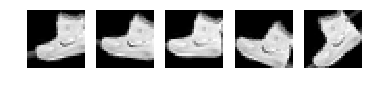

In [205]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train1[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [206]:
model1.fit_generator(datagen.flow(x_train1, y_train,batch_size=32),samples_per_epoch=x_train1.shape[0],epochs=20,validation_data=(x_test1, y_test), callbacks=callback_list)

Epoch 1/20
  24/1875 [..............................] - ETA: 13s - loss: 2.9732 - accuracy: 0.3568

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=20, validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875)`
  """Entry point for launching an IPython kernel.


1875/1875 [==============================] - 12s 6ms/step - loss: 0.7996 - accuracy: 0.7073 - val_loss: 0.3861 - val_accuracy: 0.8594
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5756 - accuracy: 0.7829 - val_loss: 0.3663 - val_accuracy: 0.8680
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5143 - accuracy: 0.8088 - val_loss: 0.3281 - val_accuracy: 0.8800
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4795 - accuracy: 0.8226 - val_loss: 0.3222 - val_accuracy: 0.8820
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4504 - accuracy: 0.8338 - val_loss: 0.3110 - val_accuracy: 0.8884
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4292 - accuracy: 0.8411 - val_loss: 0.3319 - val_accuracy: 0.8812
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4163 - accuracy: 0.8459 - val_loss: 0.3132 - val_accuracy: 0.8

###  Report the final train and validation accuracy

In [111]:
loss_and_metrics = model1.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 72us/step


In [112]:
print(loss_and_metrics)

[0.6843241023540497, 0.7418000102043152]


In [113]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)             

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [115]:
from matplotlib import pyplot as plt

### **Load CIFAR10 dataset**

In [114]:
from keras.datasets import cifar10

In [116]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [117]:
x_train.shape

(50000, 32, 32, 3)

In [118]:
y_train.shape

(50000, 1)

In [119]:
x_test.shape

(10000, 32, 32, 3)

In [120]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255

In [122]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [123]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [131]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [132]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

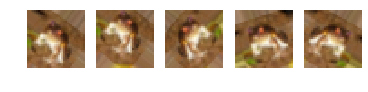

In [133]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()